In [45]:
# Import the dependencies
import random
import numpy as np
import pandas as pd
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [46]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 2000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [47]:
# Add the latitudes and longtitudes to a list
coordinates = list(lat_lngs)

# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

729

In [48]:
# Starting URL for Weather API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [49]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_description = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 15 | viligili
City not found. Skipping...
Processing Record 2 of Set 15 | jamestown
Processing Record 3 of Set 15 | bluff
Processing Record 4 of Set 15 | busselton
Processing Record 5 of Set 15 | punta arenas
Processing Record 6 of Set 15 | carnarvon
Processing Record 7 of Set 15 | lagos
Processing Record 8 of Set 15 | ribeira grande
Processing Record 9 of Set 15 | rikitea
Processing Record 10 of Set 15 | eyl
Processing Record 11 of Set 15 | mataura
Processing Record 12 of Set 15 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 15 | albany
Processing Record 14 of Set 15 | bethel
Processing Record 15 of Set 15 | port alfred
Processing Record 16 of Set 15 | bengkulu
Processing Record 17 of Set 15 | tashtagol
Processing Record 18 of Set 15 | cherskiy
Processing Record 19 of Set 15 | hermanus
Processing Record 20 of Set 15 | lakes entrance
Processing Record 21 of Set 15 | sao fi

City not found. Skipping...
Processing Record 33 of Set 18 | san fernando
Processing Record 34 of Set 18 | alta floresta
Processing Record 35 of Set 18 | naze
Processing Record 36 of Set 18 | yandoon
City not found. Skipping...
Processing Record 37 of Set 18 | kamenka
Processing Record 38 of Set 18 | hithadhoo
Processing Record 39 of Set 18 | kargasok
Processing Record 40 of Set 18 | mitu
Processing Record 41 of Set 18 | lianran
Processing Record 42 of Set 18 | ariquemes
Processing Record 43 of Set 18 | severo-kurilsk
Processing Record 44 of Set 18 | verkhnevilyuysk
Processing Record 45 of Set 18 | languyan
Processing Record 46 of Set 18 | roma
Processing Record 47 of Set 18 | caninde de sao francisco
Processing Record 48 of Set 18 | meulaboh
Processing Record 49 of Set 18 | cayenne
Processing Record 50 of Set 18 | ponta do sol
Processing Record 1 of Set 19 | deputatskiy
Processing Record 2 of Set 19 | dukat
Processing Record 3 of Set 19 | mount gambier
Processing Record 4 of Set 19 | 

Processing Record 16 of Set 22 | ust-kuyga
Processing Record 17 of Set 22 | ewa beach
Processing Record 18 of Set 22 | agdam
Processing Record 19 of Set 22 | talnakh
Processing Record 20 of Set 22 | portland
Processing Record 21 of Set 22 | anloga
Processing Record 22 of Set 22 | whitianga
Processing Record 23 of Set 22 | weesp
Processing Record 24 of Set 22 | evensk
Processing Record 25 of Set 22 | farafangana
Processing Record 26 of Set 22 | lata
Processing Record 27 of Set 22 | gizo
Processing Record 28 of Set 22 | belaya gora
Processing Record 29 of Set 22 | walvis bay
Processing Record 30 of Set 22 | shirokiy
Processing Record 31 of Set 22 | kyren
Processing Record 32 of Set 22 | bantry
Processing Record 33 of Set 22 | sulangan
Processing Record 34 of Set 22 | suzun
Processing Record 35 of Set 22 | vallenar
Processing Record 36 of Set 22 | salalah
Processing Record 37 of Set 22 | mayo
Processing Record 38 of Set 22 | rairangpur
Processing Record 39 of Set 22 | baishishan
Processin

Processing Record 4 of Set 26 | kununurra
Processing Record 5 of Set 26 | quelimane
Processing Record 6 of Set 26 | barawe
City not found. Skipping...
Processing Record 7 of Set 26 | ranong
Processing Record 8 of Set 26 | molchanovo
Processing Record 9 of Set 26 | abu dhabi
Processing Record 10 of Set 26 | pavlovka
Processing Record 11 of Set 26 | turukhansk
Processing Record 12 of Set 26 | kajaani
Processing Record 13 of Set 26 | ugoofaaru
Processing Record 14 of Set 26 | iberia
Processing Record 15 of Set 26 | mbanza-ngungu
Processing Record 16 of Set 26 | ginir
Processing Record 17 of Set 26 | burica
City not found. Skipping...
Processing Record 18 of Set 26 | rio tuba
Processing Record 19 of Set 26 | ashqelon
Processing Record 20 of Set 26 | merauke
Processing Record 21 of Set 26 | rocha
Processing Record 22 of Set 26 | bac lieu
Processing Record 23 of Set 26 | matagami
Processing Record 24 of Set 26 | kirkland lake
Processing Record 25 of Set 26 | vangaindrano
Processing Record 26

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(50)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Jamestown,US,42.0970,-79.2353,55.04,42,0,4.61,2022-03-18 01:14:30
1,Bluff,NZ,-46.6000,168.3333,63.81,69,0,3.31,2022-03-18 01:14:30
2,Busselton,AU,-33.6500,115.3333,71.42,68,100,3.60,2022-03-18 01:14:31
3,Punta Arenas,CL,-53.1500,-70.9167,39.11,64,16,14.20,2022-03-18 01:14:31
4,Carnarvon,AU,-24.8667,113.6333,82.47,57,100,14.97,2022-03-18 01:11:07
5,Lagos,NG,6.5833,3.7500,80.53,87,100,4.21,2022-03-18 01:11:16
6,Ribeira Grande,PT,38.5167,-28.7000,61.63,88,100,41.45,2022-03-18 01:14:31
7,Rikitea,PF,-23.1203,-134.9692,80.91,78,12,12.80,2022-03-18 01:14:32
8,Eyl,SO,7.9803,49.8164,74.21,82,40,9.91,2022-03-18 01:14:32
9,Mataura,NZ,-46.1927,168.8643,63.48,46,0,1.12,2022-03-18 01:14:33


In [51]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City ID")


In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

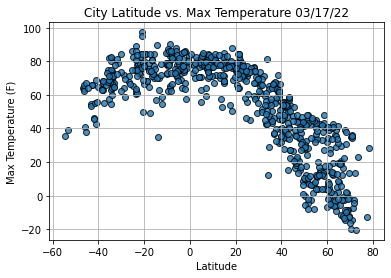

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

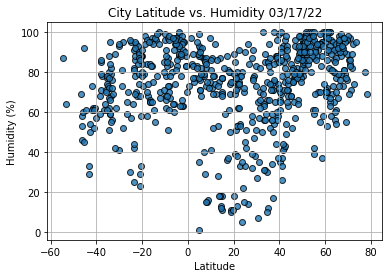

In [55]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

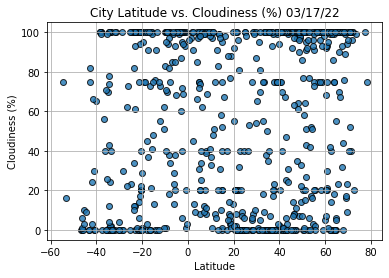

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show play
plt.show()

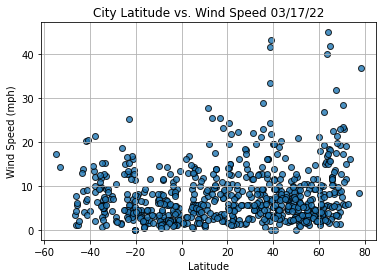

In [57]:
# Build the scatter plots for the latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(intercept, 2)) + "x +" + str(round(intercept, 2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)

    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Temp")
    plt.show()

In [66]:
# Create the North and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) < 0]

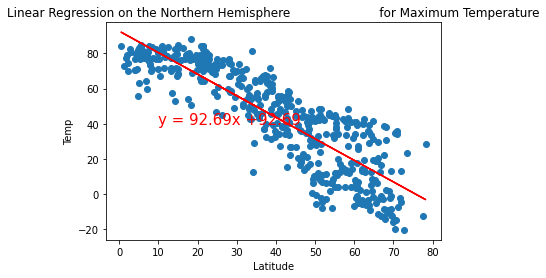

In [70]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10, 40))

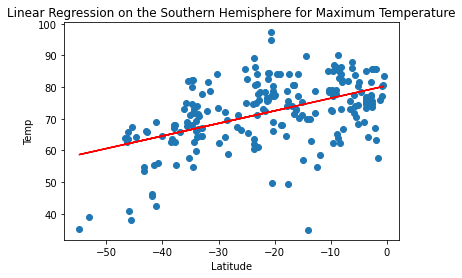

In [78]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp', (-50, 90))

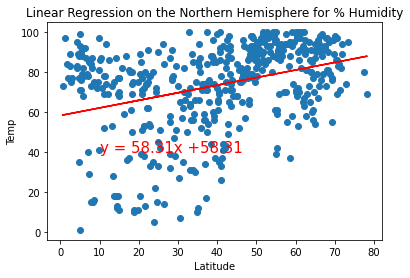

In [79]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity', (40,10))

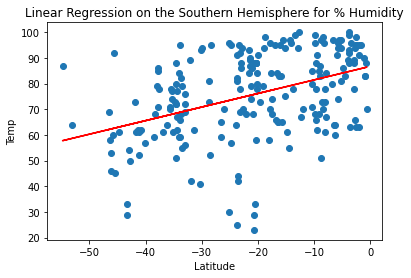

In [80]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity', (-50, 15))

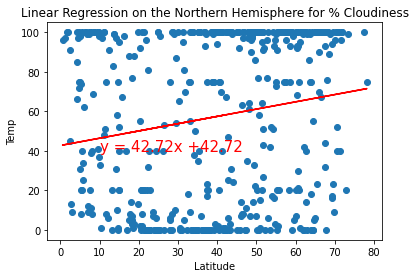

In [84]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness',
                      '% Cloudiness', (10,55))

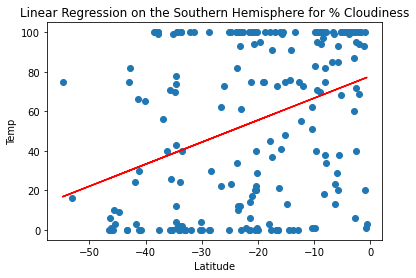

In [85]:
# Linear regression on the southren Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness', (-50, 60))

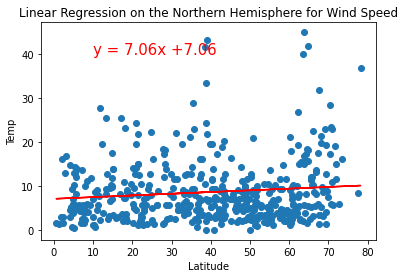

In [87]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed',
                      'Wind Speed', (40,35))

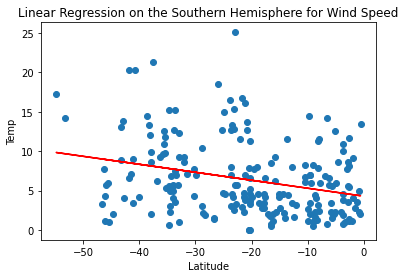

In [88]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed',
                      'Wind Speed', (-50, 35))